In [7]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [8]:
def plot_portfolio(tickers, weights, start, end):
    """
    Plots portfolio performance vs any number of benchmark ETFs/stocks,
    assuming dividend reinvestment.

    Parameters
    ----------
    tickers : list[str]
        Portfolio stock tickers.
    weights : list[float]
        Portfolio weights (must sum to 1.0).
    start : str
        Start date (YYYY-MM-DD).
    end : str
        End date (YYYY-MM-DD).
    """
    # --- Validate inputs ---
    weights = np.array(weights, dtype=float)
    if len(tickers) != len(weights):
        raise ValueError("Length of tickers and weights must match.")
    sum_of_weights = weights.sum()
    if not np.isclose(sum_of_weights, 1.0):
        raise ValueError(f"Portfolio weights must sum to 1.0. Sum: {sum_of_weights}")

    all_tickers = tickers

    # --- Download Adjusted Close data ---
    data = yf.download(all_tickers, start=start, end=end, progress=False)["Close"].dropna()

    # --- Separate portfolio and benchmark data ---
    port_data = data[tickers]

    # --- Normalize prices ---
    port_norm = port_data / port_data.iloc[0]

    # --- Compute portfolio performance ---
    portfolio = (port_norm * weights).sum(axis=1)

    # --- Plot ---
    plt.figure(figsize=(12, 7))
    plt.plot(portfolio.index, portfolio, label="Your Portfolio", linewidth=2.5, color="black")
    plt.title("Portfolio Performance vs Benchmarks (Dividend Reinvestment Assumed)")
    plt.xlabel("Date")
    plt.ylabel("Growth of $1")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_126992/3820833898.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_tickers, start=start, end=end, progress=False)["Close"].dropna()


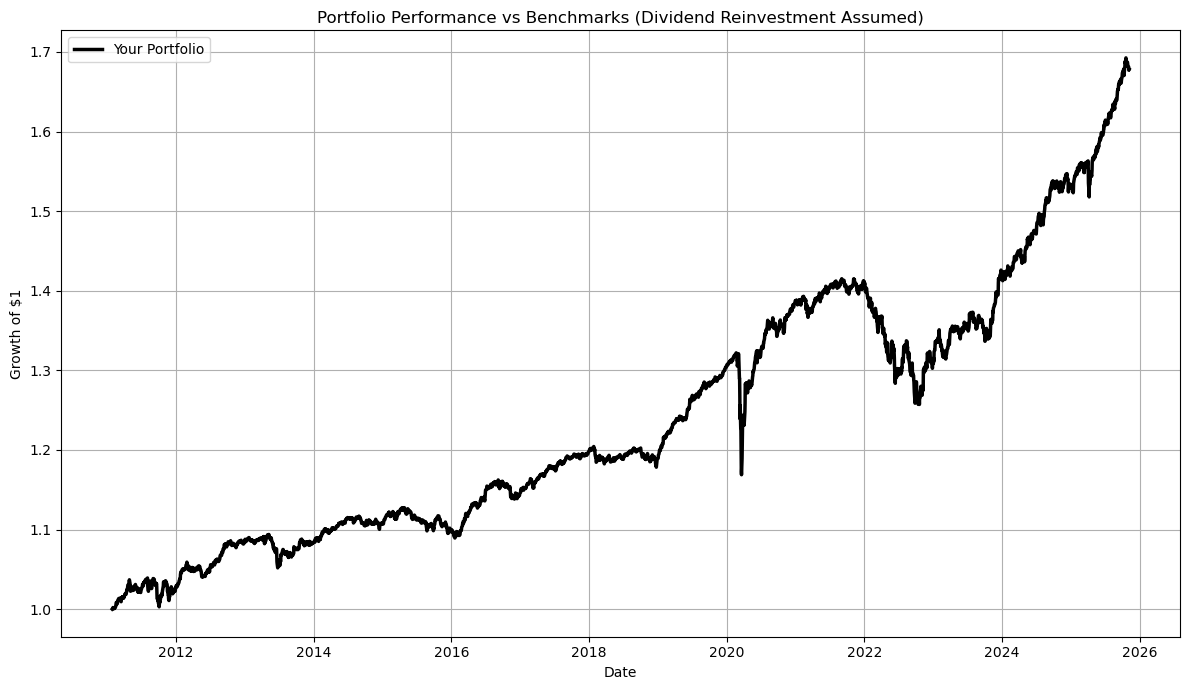

In [17]:
tickers = ["BIL",  "VCSH", "VCIT", "HYG", "VOO", "VXUS",      "GLD",  "SLV"    ]
weights = [0.40,     0.20,    0.20,  0.10,    0.025, 0.025,       0.025,  0.025    ]
start = "2010-01-01"
end = "2025-11-07"
plot_portfolio(tickers, weights, start, end)